In [2]:

#improt basic packages
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
import pandas as pd
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from IPython.core.interactiveshell import InteractiveShell
from pandas_profiling import ProfileReport
import umap

InteractiveShell.ast_node_interactivity = "all"


In [ ]:
DrawingOptions.bondLineWidth=1.8
mol = Chem.MolFromSmiles('Brc1c(N)c(CNC2CCC(O)CC2)cc(Br)c1')
mol2=Chem.MolFromSmiles('C1CC(CCC1NCC2=C(C(=CC(=C2)Br)Br)N)O')
mol3=Chem.MolFromSmiles('[As](=O)(O)(O)c1ccc(NC(=O)N)cc1')
Descriptors.MolLogP(mol)
Descriptors.MolLogP(mol2)
mol
mol2
mol3
rdkit.Chem.rdMolDescriptors.BCUT2D(mol3)

In [ ]:
df = pd.read_csv('/home/wzabsd/Desktop/NAIST-PBL1/datasets/3CL_enzymatic_activity-clean.tsv', sep='\t')
#df.head()
profile = ProfileReport(df, title="Pandas Profiling Report")


In [ ]:

smiles_l=df['washed_SMILES'].tolist()
smiles_l[smiles_l.index('[i+]1c2c(c3c1cccc3)cccc2')]='C1=CC=C2C(=C1)C3=CC=CC=C3[I+]2'
#smiles_l.head()
mols_l=[Chem.MolFromSmiles(smile) for smile in smiles_l]
#Chem.MolToMolFile(mols_l, '/home/wzabsd/Desktop/NAIST-PBL1/output.mol')

In [ ]:
des_l=[des_name[0] for des_name in Descriptors._descList]
desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(des_l)
descriptors = pd.DataFrame([desc_calc.CalcDescriptors(mol) for mol in mols_l])
descriptors.columns = des_l
descriptors.index = smiles_l

In [ ]:
features=descriptors


In [ ]:
descriptors.head()


In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_traning = pd.read_csv('/home/wzabsd/Desktop/NAIST-PBL1/descriptors_selected.csv')
df_traning_data = df_traning.loc[:,"MolLogP":"EState_VSA9"].values
df_traning_data=StandardScaler().fit_transform(df_traning_data)
df_traning.head()
reducer = umap.UMAP(random_state=2021)
embedding = reducer.fit_transform(df_traning_data)

,MolLogP,MinAbsEStateIndex,VSA_EState7,MinEStateIndex,Kappa3,qed,FractionCSP3,VSA_EState4,FpDensityMorgan3,PEOE_VSA8,...,EState_VSA6,SMR_VSA6,VSA_EState2,Kappa2,PEOE_VSA10,SMR_VSA3,SlogP_VSA12,fr_unbrch_alkane,EState_VSA9,Class
0,-1.188875,0.030728,-0.063989,0.265546,-0.423571,0.830924,-0.005020,-0.795431,1.268169,-0.496933,...,-0.924234,-0.588239,0.315723,-0.567654,-0.113181,0.158111,1.162577,-0.182668,-0.156986,Inactive
1,-1.595596,-0.006083,-0.479609,-0.125721,-0.481763,0.090666,-0.005020,-0.888497,0.629946,-0.907405,...,-0.924234,-0.588239,0.310769,-0.527838,0.220739,0.158111,1.162577,-0.182668,-0.156986,Inactive
2,-1.287433,0.315045,-0.659524,-3.377329,0.395694,-1.393692,0.804574,-0.415155,-0.219350,-0.466768,...,-0.924234,0.613320,1.968518,0.556225,0.574053,1.223754,5.110577,-0.182668,-0.176094,Inactive
3,-0.770812,-0.133805,-0.166665,0.282786,-0.150364,0.733461,0.804574,0.646247,-0.590977,-1.303558,...,-0.924234,-1.029529,-0.000134,-0.877479,-0.801784,-0.294564,1.162577,-0.182668,-0.525457,Inactive
4,-0.016923,6.920824,-0.760755,-2.212600,-0.348367,0.074012,2.076793,-0.577562,-2.182748,-1.303558,...,-0.924234,-1.029529,-1.070231,-1.314359,-0.801784,-0.862965,2.338632,-0.182668,-1.039527,Inactive


,FractionCSP3,qed,SMR_VSA7,PEOE_VSA8,FpDensityMorgan1,EState_VSA4,PEOE_VSA7,MaxAbsEStateIndex,FpDensityMorgan3,SMR_VSA5,...,VSA_EState8,EState_VSA2,PEOE_VSA10,EState_VSA6,SMR_VSA6,PEOE_VSA9,EState_VSA8,SlogP_VSA5,VSA_EState3,Class
0,0.454545,0.731568,0.208175,0.111553,0.771632,0.000000,0.053936,0.619247,0.859649,0.064340,...,0.098414,0.146073,0.075140,0.0,0.047912,0.146680,0.117095,0.063116,0.077439,Inactive
1,0.454545,0.552792,0.208175,0.054786,0.674576,0.032298,0.053936,0.621065,0.777428,0.063520,...,0.094156,0.043713,0.111578,0.0,0.047912,0.097686,0.117095,0.040864,0.113434,Inactive
2,0.666667,0.194311,0.070094,0.115724,0.530921,0.000000,0.067522,0.636922,0.668014,0.106393,...,0.208449,0.044370,0.150131,0.0,0.178370,0.103817,0.311559,0.069573,0.085657,Inactive
3,0.666667,0.708030,0.000000,0.000000,0.704160,0.000000,0.028857,0.577204,0.620138,0.048338,...,0.200142,0.084425,0.000000,0.0,0.000000,0.038746,0.089191,0.047990,0.016737,Inactive
4,1.000000,0.548770,0.000000,0.000000,0.690073,0.000000,0.000000,0.580547,0.415073,0.027082,...,0.106685,0.000000,0.000000,0.0,0.000000,0.000000,0.154143,0.000000,0.009540,Inactive


(9241, 2)

Text(0.5, 1.0, 'UMAP projection of the descriptors dataset')

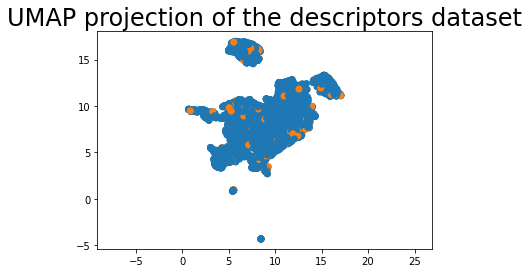

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_traning = pd.read_csv('/home/wzabsd/Desktop/NAIST-PBL1/descriptors_selected.csv')
df_traning.head()
df_traning_data = df_traning.loc[:,"FractionCSP3":"VSA_EState3"].values
df_traning_data=StandardScaler().fit_transform(df_traning_data)
reducer = umap.UMAP(random_state=24)
embedding = reducer.fit_transform(df_traning_data)
embedding.shape
import seaborn as sns
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_traning.Class.map({"Active":1, "Inactive":0})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the descriptors dataset', fontsize=24)

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

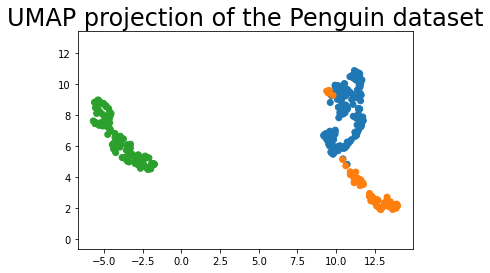

In [16]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()
penguins.species_short.value_counts()
reducer = umap.UMAP()
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
embedding = reducer.fit_transform(scaled_penguin_data)
penguins.head()
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)